<a href="https://colab.research.google.com/github/naman2411/Forex-Exchange-Prediction-/blob/main/Forex_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("Foreign_Exchange_Rates.csv")

In [ ]:
df.head()
print(df.columns)

Index(['Unnamed: 0', 'Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')


In [ ]:
df = df.drop(columns=df.columns[0])


In [ ]:
new_col_names = ['Time Series', 'aud', 'eur', 'nzd', 'gbp', 'brl', 'cnd', 'cny', 'hkd', 'idr', 'krw', 'mxn', 'zar', 'sgd', 'dkk', 'jpy', 'myr', 'nok', 'sek', 'lkr', 'chf', 'twd', 'thb']
df.columns = new_col_names
df.columns = map(str.upper, df.columns)
df.rename(columns=lambda x:x+'_USD', inplace=True)
df.rename(columns={'TIME SERIES_USD':'Time Series'}, inplace=True)

In [ ]:
df = df.replace('ND', np.nan)
df = df.dropna().reset_index(drop=True)
df.isna().sum()

Time Series    0
AUD_USD        0
EUR_USD        0
NZD_USD        0
GBP_USD        0
BRL_USD        0
CND_USD        0
CNY_USD        0
HKD_USD        0
IDR_USD        0
KRW_USD        0
MXN_USD        0
ZAR_USD        0
SGD_USD        0
DKK_USD        0
JPY_USD        0
MYR_USD        0
NOK_USD        0
SEK_USD        0
LKR_USD        0
CHF_USD        0
TWD_USD        0
THB_USD        0
dtype: int64

In [ ]:
df.dtypes
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df['Time Series'] = pd.to_datetime(df['Time Series'])
df['month'] = df['Time Series'].dt.month
df['year'] = df['Time Series'].dt.year
df['month_year'] = df['Time Series'].dt.to_period('M')

In [ ]:
df['AUD_USD'].count()

5015

In [ ]:
df_groupby_aud = df.groupby('month_year').AUD_USD.mean().reset_index()

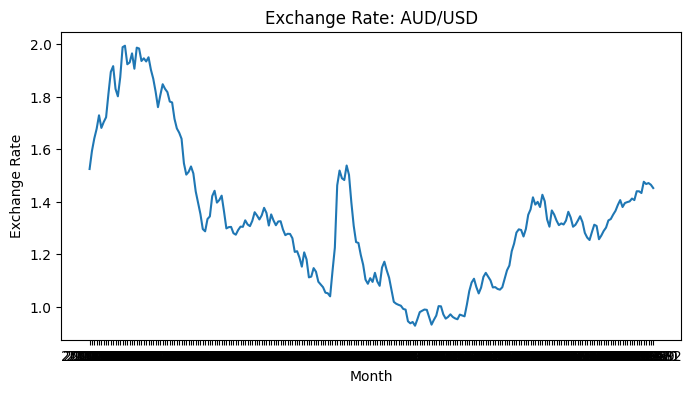

In [ ]:
from matplotlib import pyplot as plt
x = df_groupby_aud['month_year'].astype(str)
y = df_groupby_aud['AUD_USD']
plt.figure(figsize=(8,4))
plt.plot(x, y)
plt.title("Exchange Rate: AUD/USD")
plt.xlabel("Month")
plt.ylabel("Exchange Rate")
plt.show()

In [ ]:
groupby_all = df.groupby('month_year').apply(lambda x: pd.Series
           ({
              'AUD_mean': x['AUD_USD'].mean(),
              'EUR_mean': x['EUR_USD'].mean(),
              'NZD_mean': x['NZD_USD'].mean(),
              'SGD_mean': x['SGD_USD'].mean(),
              'GBP_mean': x['GBP_USD'].mean(),
              'JPY_mean': x['JPY_USD'].mean(),
              'CHF_mean': x['CHF_USD'].mean()
                                             })).reset_index()
groupby_all = pd.DataFrame(groupby_all)
groupby_all['USD_mean'] = [1 for i in range(240)]
groupby_all.head()

,month_year,AUD_mean,EUR_mean,NZD_mean,SGD_mean,GBP_mean,JPY_mean,CHF_mean,USD_mean
0,2000-01,1.524645,0.987345,1.951050,1.675665,0.609620,105.296000,1.590260,1
1,2000-02,1.593205,1.017025,2.039655,1.702790,0.625020,109.388500,1.634770,1
2,2000-03,1.641087,1.037013,2.040430,1.715343,0.632948,106.307391,1.663617,1
3,2000-04,1.677935,1.058630,2.016400,1.709590,0.631990,105.627000,1.665650,1
4,2000-05,1.729309,1.104023,2.125468,1.728573,0.662927,108.320455,1.719009,1


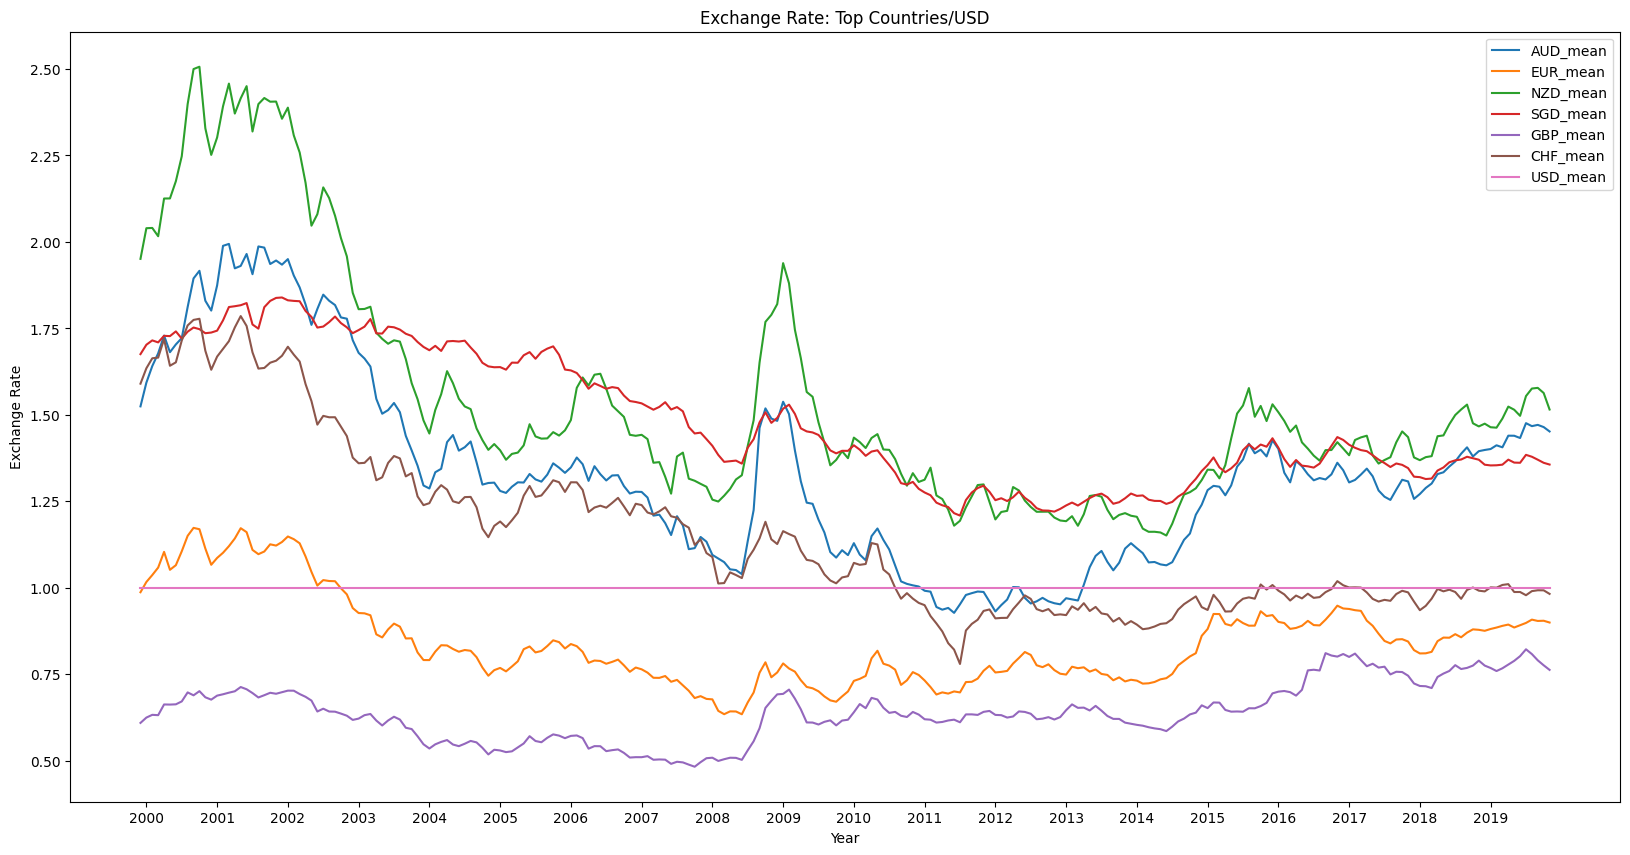

In [ ]:
y_all = groupby_all[['AUD_mean', 'EUR_mean', 'NZD_mean', 'SGD_mean', 'GBP_mean', 'CHF_mean','USD_mean']]
labels = ["AUD_mean", "EUR_mean", "NZD_mean", "SGD_mean", "GBP_mean", "CHF_mean", "USD_mean"]
x_ticks = list(range(1, 240, 12))
x_ticklabels = [x for x in range(2000, 2020)]
plt.figure(figsize=(20,10))
ax = plt.subplot()
plt.plot(x, y_all)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)
plt.legend(labels)
plt.title("Exchange Rate: Top Countries/USD")
plt.xlabel("Year")
plt.ylabel("Exchange Rate")
plt.show()

In [ ]:
aud_sgd = df.loc[:,['AUD_USD', 'SGD_USD']]
aud = np.array(aud_sgd.iloc[:,0])
sgd = np.array(aud_sgd.iloc[:,1])

In [ ]:
import statsmodels.stats.power as sms
n = sms.TTestPower().solve_power(effect_size=0.8, power=0.9, alpha=0.05)
print(n)

18.44622546977485


In [ ]:
aud_sample = np.random.choice(aud, size=18)
sgd_sample = np.random.choice(sgd, size=18)

In [ ]:
from scipy.stats import shapiro, pearsonr
stat, p1 = shapiro(aud_sample)
stat, p2 = shapiro(sgd_sample)
print(p1)
print(p2)
stat, p3 = pearsonr(aud_sample, sgd_sample)
print(p3)

0.37455064058303833
0.007497522979974747
0.7340700903153474


In [ ]:
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(aud_sample, sgd_sample)
print(pval)

0.0003038729854674427


In [ ]:
ir_df = pd.read_csv("aud usd interest carry trade.csv")
ir_df.head()

,Unnamed: 0,Date,Long Carry,Short Carry
0,0,01-01-2017,0.65%,-2.42%
1,1,01-02-2017,0.78%,-2.50%
2,2,01-03-2017,0.66%,-2.38%
3,3,01-04-2017,0.34%,-2.10%
4,4,01-05-2017,0.32%,-2.22%


In [ ]:
x_ir = ir_df['Long Carry'].astype(str)
x_ir = x_ir.replace({'%':''}, regex = True)
x_ir = x_ir.astype(float)
x_ir = np.array(x_ir).reshape(-1,1)
aud_usd_fx = df_groupby_aud[(df_groupby_aud['month_year'] >= '2017-01') & (df_groupby_aud['month_year'] <='2019-12')].reset_index(drop=True)
aud_usd = aud_usd_fx['AUD_USD']
y_fx = aud_usd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_ir, y_fx, train_size=0.8, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.6947623687482264
0.677629545382614


In [ ]:
model = LinearRegression()
model.fit(x_ir, y_fx)
y_fx_predict = model.predict(x_ir)
print(model.score(x_ir, y_fx))

0.720032833933373


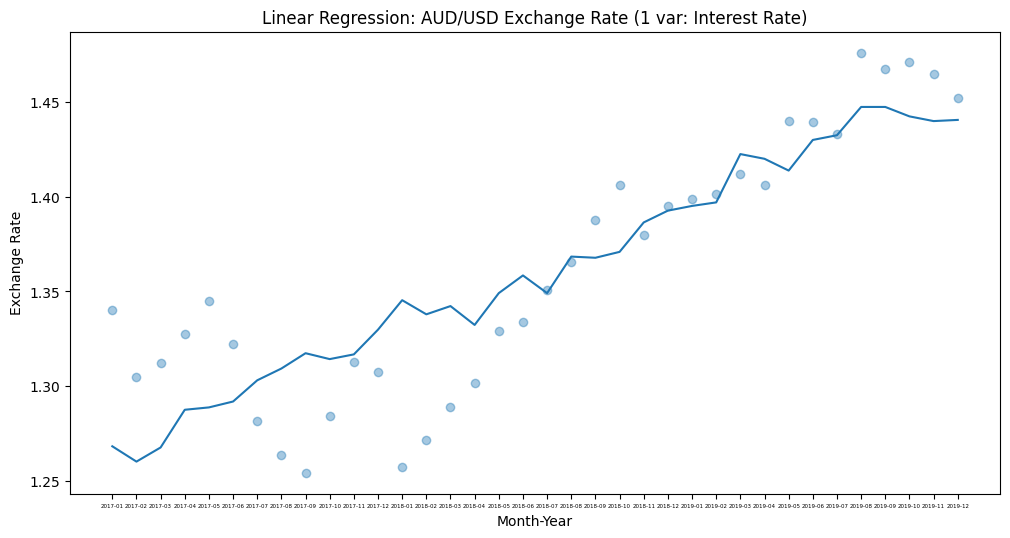

In [ ]:
month_year = aud_usd_fx['month_year']
month_year = month_year.astype(str)
plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict)
plt.title("Linear Regression: AUD/USD Exchange Rate (1 var: Interest Rate)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=4)
plt.show()

In [ ]:
aus_gdp = pd.read_csv("AUS GDP.csv")
usa_gdp = pd.read_csv("USA GDP.csv")
aus_gdp = aus_gdp.rename(columns={'GDP': 'AUS_GDP'})
#aus_usa_gdp = pd.merge(aus_gdp, usa_gdp, on="month_year", how="inner")
aus_usa_gdp = aus_usa_gdp.rename(columns={'GDP': 'USA_GDP'})
aus_usa_gdp['GDP_diff'] = aus_usa_gdp['AUS_GDP'] - aus_usa_gdp['USA_GDP']
aus_usa_gdp_20172019 = aus_usa_gdp[(aus_usa_gdp['month_year'] >= '2017-01') & (aus_usa_gdp['month_year'] <='2019-12')].reset_index(drop=True)
gdp_diff = ["%.4f" %num for num in aus_usa_gdp_20172019['GDP_diff']]

NameError: name 'aus_usa_gdp' is not defined